In [1]:
import sys
import numpy as np
sys.path.append("../src")
import sklearn
import torch
import datasets
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/home/steinad/anaconda3/envs/selec/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Iteration 1

In [8]:
meta_set = torch.load("../results/logs_cifar10_uniform_noise_0.4_select_1/cached_meta_set")
print(meta_set.data[0].shape)

(32, 32, 3)


In [18]:
for i in range(10):
    class_frac = np.sum(meta_set.targets == i) / meta_set.targets.shape[0]
    print("Percent of validation set with label", i, "is", class_frac)

Percent of validation set with label 0 is 0.08
Percent of validation set with label 1 is 0.08
Percent of validation set with label 2 is 0.12
Percent of validation set with label 3 is 0.1
Percent of validation set with label 4 is 0.07
Percent of validation set with label 5 is 0.19
Percent of validation set with label 6 is 0.07
Percent of validation set with label 7 is 0.11
Percent of validation set with label 8 is 0.09
Percent of validation set with label 9 is 0.09


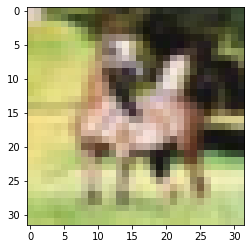

Label: 7


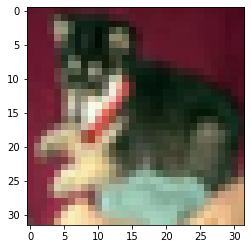

Label: 5


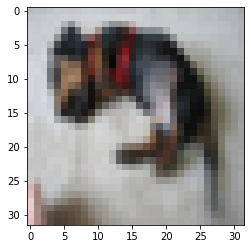

Label: 5


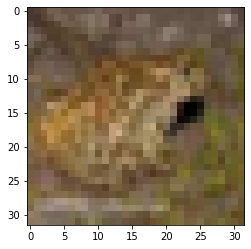

Label: 6


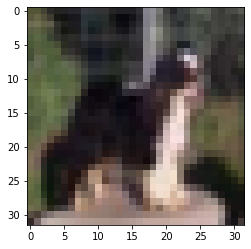

Label: 5


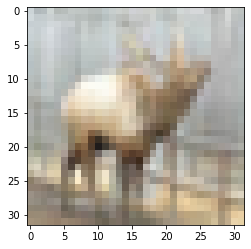

Label: 4


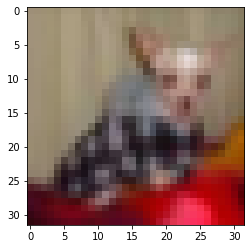

Label: 5


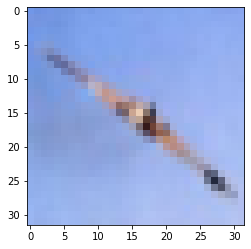

Label: 0


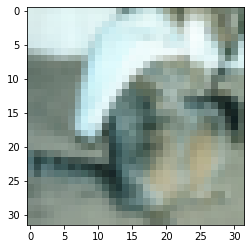

Label: 3


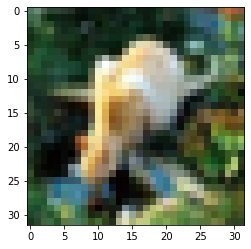

Label: 3


In [13]:
for i in range(10):
    plt.imshow(meta_set.data[i])
    plt.show()
    print("Label:", meta_set.targets[i])

## Iteration 2

In [26]:
meta_set = torch.load("../results/logs_cifar10_uniform_noise_0.4_select_2/cached_meta_set")
print(meta_set.targets.shape[0])
for i in range(10):
    class_frac = np.sum(meta_set.targets[100:] == i) / meta_set.targets[100:].shape[0]
    print("Percent of validation set with label", i, "is", class_frac)

200
Percent of validation set with label 0 is 0.1
Percent of validation set with label 1 is 0.09
Percent of validation set with label 2 is 0.13
Percent of validation set with label 3 is 0.11
Percent of validation set with label 4 is 0.08
Percent of validation set with label 5 is 0.07
Percent of validation set with label 6 is 0.11
Percent of validation set with label 7 is 0.07
Percent of validation set with label 8 is 0.11
Percent of validation set with label 9 is 0.13


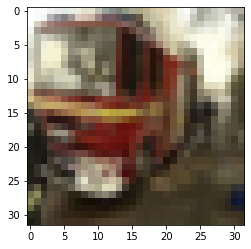

Label: 9


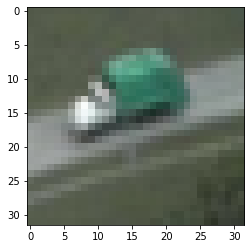

Label: 9


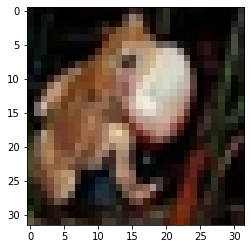

Label: 6


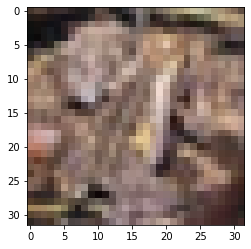

Label: 6


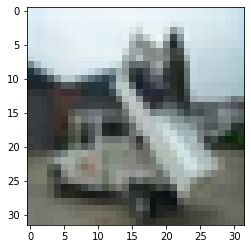

Label: 9


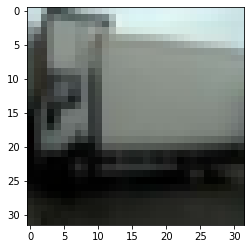

Label: 9


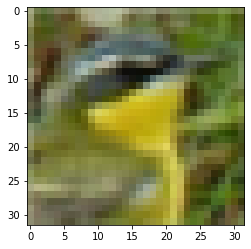

Label: 2


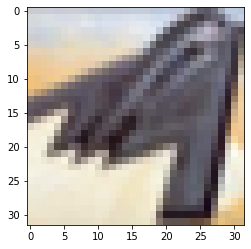

Label: 0


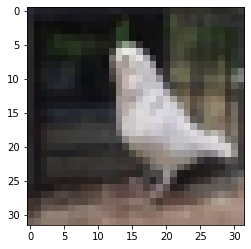

Label: 2


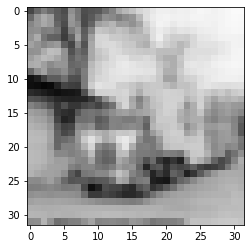

Label: 9


In [23]:
for i in range(10):
    plt.imshow(meta_set.data[100+i])
    plt.show()
    print("Label:", meta_set.targets[100+i])

## Iteration 10

In [27]:
meta_set = torch.load("../results/logs_cifar10_uniform_noise_0.4_select_10/cached_meta_set")
print(meta_set.targets.shape[0])
for i in range(10):
    class_frac = np.sum(meta_set.targets[900:] == i) / meta_set.targets[900:].shape[0]
    print("Percent of validation set with label", i, "is", class_frac)

1000
Percent of validation set with label 0 is 0.1
Percent of validation set with label 1 is 0.14
Percent of validation set with label 2 is 0.07
Percent of validation set with label 3 is 0.14
Percent of validation set with label 4 is 0.09
Percent of validation set with label 5 is 0.09
Percent of validation set with label 6 is 0.09
Percent of validation set with label 7 is 0.1
Percent of validation set with label 8 is 0.08
Percent of validation set with label 9 is 0.1


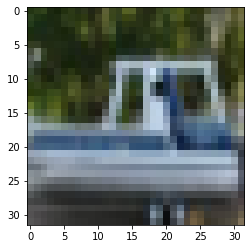

Label: 8


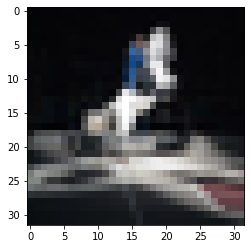

Label: 7


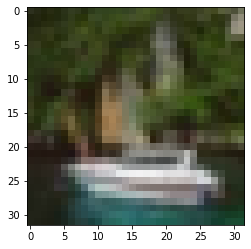

Label: 8


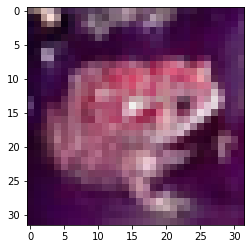

Label: 6


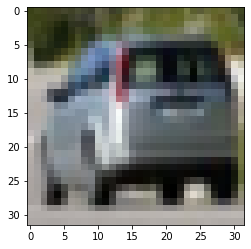

Label: 1


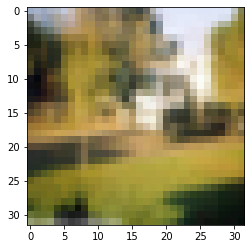

Label: 9


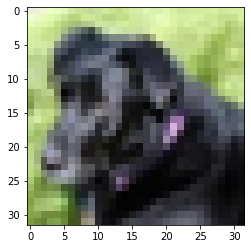

Label: 5


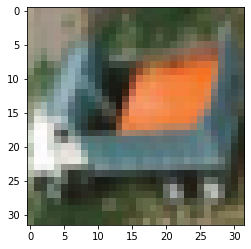

Label: 9


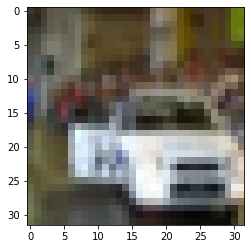

Label: 1


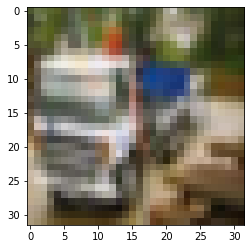

Label: 9


In [25]:
for i in range(10):
    plt.imshow(meta_set.data[900+i])
    plt.show()
    print("Label:", meta_set.targets[900+i])

In [191]:
meta_set = torch.load("/data5/steinad/neurips22/results/logs_MNIST_ours1_biased_0.6_lr_0.1_pretrained_select_100_1_1/cached_meta_set")
print(meta_set.targets.shape[0])
for i in range(10):
    class_frac = torch.sum(meta_set.targets == i) #/ meta_set.targets.shape[0]
    print("Percent of validation set with label", i, "is", class_frac)

25
Percent of validation set with label 0 is tensor(3)
Percent of validation set with label 1 is tensor(4)
Percent of validation set with label 2 is tensor(6)
Percent of validation set with label 3 is tensor(3)
Percent of validation set with label 4 is tensor(1)
Percent of validation set with label 5 is tensor(3)
Percent of validation set with label 6 is tensor(1)
Percent of validation set with label 7 is tensor(1)
Percent of validation set with label 8 is tensor(1)
Percent of validation set with label 9 is tensor(2)


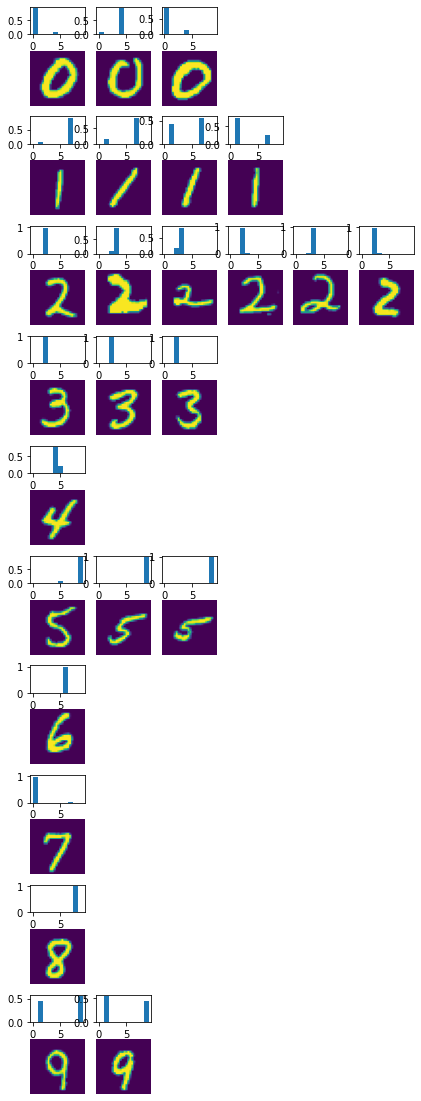

In [199]:
# for i in range(40):
#     plt.imshow(meta_set.data[40+i])
#     plt.show()
#     print("Label:", meta_set.targets[40+i])
from mpl_toolkits.axes_grid1 import ImageGrid
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure(figsize=(20, 20))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(10, 6),  # creates 2x2 grid of axes
                     axes_pad=0.15,  # pad between axes in inch.
                     cbar_mode="each",
                     cbar_location="top",
                     cbar_size="50%",
                     cbar_pad="30%",
                     )

iters = 0
for axs, cax in zip(grid, grid.cbar_axes):
    
    i = iters // 6
    mask = (meta_set.targets == i)
    cnt = torch.sum(mask).item()
    if iters % 6 >= cnt:
        iters += 1
        continue
        
    axs.axis('off')
    axs.imshow(meta_set.data[mask][iters % 6])
    dist = cax.hist([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], weights=pred_dist.detach().data[mask][iters % 6].numpy())
    
    iters += 1
    
iters = 0
for axs in grid:
    i = iters // 6
    mask = (meta_set.targets == i)
    cnt = torch.sum(mask).item()
    if iters % 6 >= cnt:
        grid[iters].remove()
        grid.cbar_axes[iters].remove()
        # fig.delaxes(axs)
        iters += 1
        continue
    iters += 1
        
plt.savefig('RBC_biased_metaset.eps')

In [187]:
from models.DNN import *
import torch.nn.functional as F
from torch.utils.data import DataLoader

base_model_path = "/data5/steinad/neurips22/results/logs_MNIST_biased_0.6_lr_0.1_batchsize_128_basemodel"

model = DNN_three_layers(4096, low_dim=128)
best_epoch = str(torch.load(base_model_path + "/early_stopping_epoch"))
print(best_epoch)
state = torch.load(base_model_path + "/cached_model")
model.load_state_dict(state)
model.eval()

72


DNN_three_layers(
  (fc1): Linear(in_features=784, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)

In [192]:
metaloader = DataLoader(meta_set, batch_size=32, shuffle=False)
pred_dist = torch.zeros((meta_set.targets.shape[0],10))

for _, (indices, data, target) in enumerate(metaloader):
    pred_dist[indices] = F.softmax(model(data), dim=1)

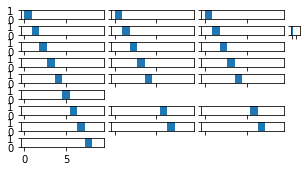

In [92]:
fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(9, 4),  # creates 2x2 grid of axes
                     axes_pad=0.1,  # pad between axes in inch.
                     )

iters = 0
for axs in grid:
    i = iters // 4
    mask = (meta_set.targets == i)
    cnt = torch.sum(mask).item()
    if iters % 4 >= cnt:
        # grid[iters].remove()
        # fig.delaxes(axs)
        iters += 1
        continue
    axs.hist([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], weights=pred_dist.detach().data[mask][iters % 4].numpy())
    iters += 1
    
iters = 0
for axs in grid:
    i = iters // 4
    mask = (meta_set.targets == i)
    cnt = torch.sum(mask).item()
    if iters % 4 >= cnt:
        grid[iters].remove()
        # fig.delaxes(axs)
        iters += 1
        continue
    iters += 1
        
plt.show()

In [189]:
from datasets.dataloader import dataset_wrapper
import numpy
import torchvision.transforms as transforms

meta_set = torch.load("/data5/steinad/neurips22/results//logs_MNIST_random_biased_0.6_lr_0.1_pretrained_select_100_1_1/cached_meta_set")
# select = []
# for i in range(10):
#     shuf = torch.randperm(torch.sum(train_set.targets == i))
#     select.append(torch.nonzero(train_set.targets == i)[shuf][:10].flatten())
# select = torch.cat(select)
# print(select.shape)
# transform_train = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
# meta_set = dataset_wrapper(torch.clone(train_set.data[select]), torch.clone(train_set.targets[select]), transform_train)
    
for i in range(10):
    class_frac = torch.sum(meta_set.targets == i) #/ meta_set.targets.shape[0]
    print("Percent of validation set with label", i, "is", class_frac)
print(meta_set.targets.shape[0])

Percent of validation set with label 0 is tensor(10)
Percent of validation set with label 1 is tensor(10)
Percent of validation set with label 2 is tensor(10)
Percent of validation set with label 3 is tensor(10)
Percent of validation set with label 4 is tensor(10)
Percent of validation set with label 5 is tensor(10)
Percent of validation set with label 6 is tensor(10)
Percent of validation set with label 7 is tensor(10)
Percent of validation set with label 8 is tensor(10)
Percent of validation set with label 9 is tensor(10)
100


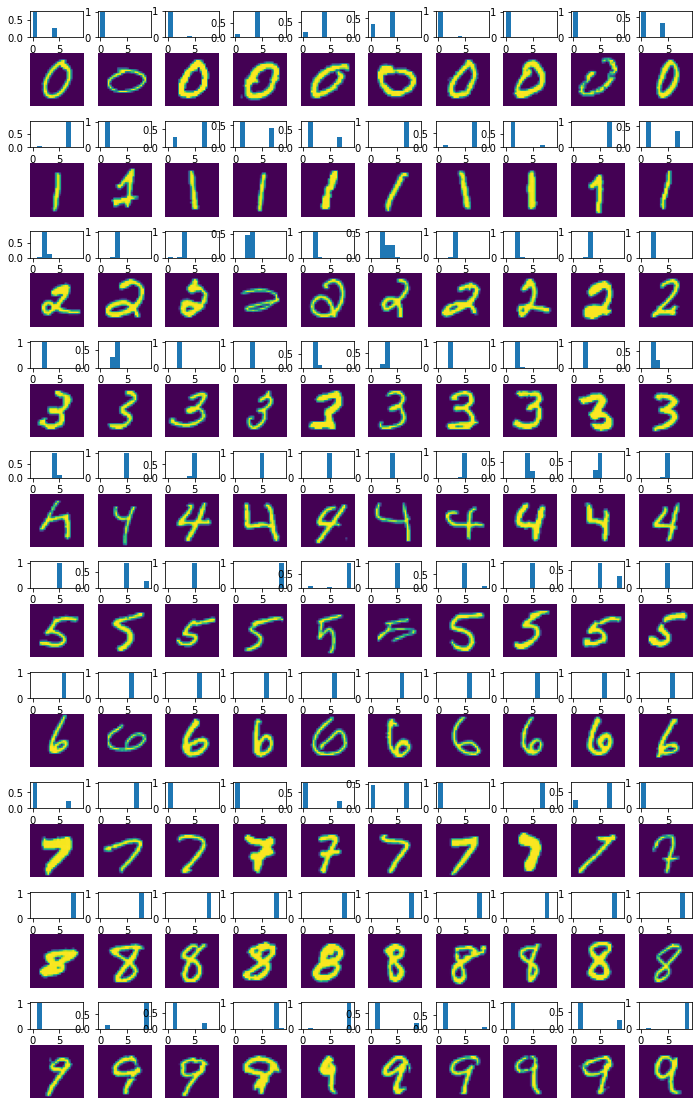

In [190]:
fig = plt.figure(figsize=(20, 20))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(10, 10),  # creates 2x2 grid of axes
                     axes_pad=0.2,  # pad between axes in inch.
                     cbar_mode="each",
                     cbar_location="top",
                     cbar_size="50%",
                     cbar_pad="30%",
                     )

iters = 0
for axs, cax in zip(grid, grid.cbar_axes):
    
    i = iters // 10
    mask = (meta_set.targets == i)
    cnt = torch.sum(mask).item()
    if iters % 10 >= cnt:
        iters += 1
        continue
        
    axs.imshow(meta_set.data[mask][iters % 10])
    axs.axis('off')
    dist = cax.hist([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], weights=pred_dist.detach().data[mask][iters % 10].numpy())
    
    iters += 1
    
iters = 0
for axs in grid:
    i = iters // 10
    mask = (meta_set.targets == i)
    cnt = torch.sum(mask).item()
    if iters % 10 >= cnt:
        grid[iters].remove()
        grid.cbar_axes[iters].remove()
        # fig.delaxes(axs)
        iters += 1
        continue
    iters += 1
        
plt.show()

In [169]:
base_model_path = "/data5/steinad/neurips22/results//logs_MNIST_imbalanced_0.005_lr_0.1_batchsize_128_basemodel/"

model = DNN_three_layers(4096, low_dim=128)

state = torch.load(base_model_path + "/cached_model")
model.load_state_dict(state)
model.eval()
metaloader = DataLoader(meta_set, batch_size=32, shuffle=False)
pred_dist = torch.zeros((meta_set.targets.shape[0],10))

for _, (indices, data, target) in enumerate(metaloader):
    pred_dist[indices] = F.softmax(model(data), dim=1)

diffs = []
for i in range(len(pred_dist)):
    _, indices = torch.sort(pred_dist[i, :], descending=True)
    
    diffs.append(pred_dist[i, indices[0]].detach() - pred_dist[i, indices[1]].detach())

print(torch.min(torch.tensor(diffs)))

tensor(0.9956)


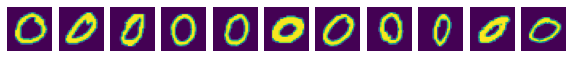

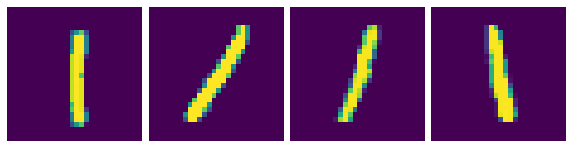

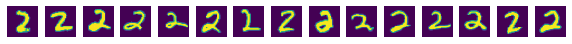

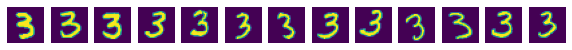

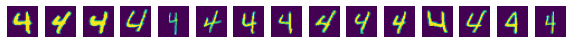

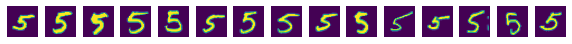

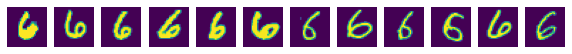

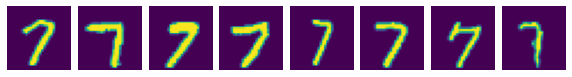

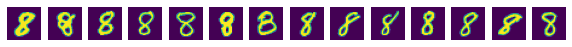

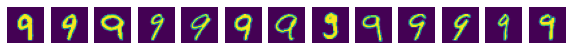

In [66]:
meta_set = torch.load("../results/logs_MNIST_uniform_noise_0.4_select_3_3/cached_meta_set")

for i in range(10):
    mask = (meta_set.targets == i)
    cnt = torch.sum(mask).item()
    fig = plt.figure(figsize=(10, 10))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(1, cnt),  # creates 2x2 grid of axes
                     axes_pad=0.1,  # pad between axes in inch.
                     )
    for axs, id in zip(grid, range(cnt)):
        axs.imshow(meta_set.data[mask][id])
        axs.set_axis_off()
    plt.show()

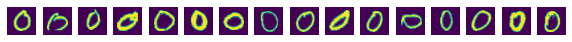

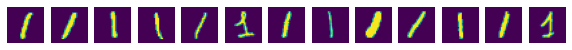

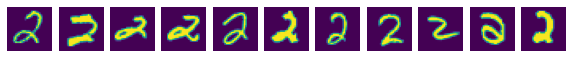

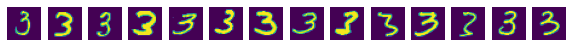

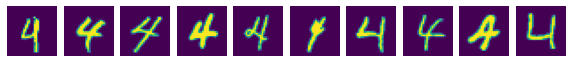

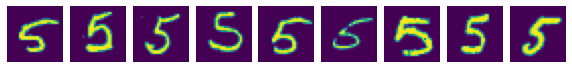

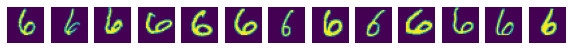

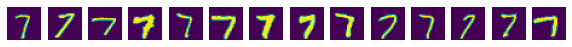

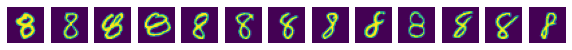

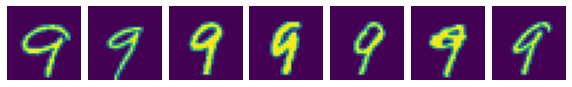

In [68]:
train_set = torch.load("../results/logs_MNIST_uniform_noise_0.4_select_1_3/cached_train_set")
true_labels = torch.load("../results/logs_MNIST_uniform_noise_0.4_select_1_3/cached_train_origin_labels")
rand_selection = torch.randperm(train_set.targets.shape[0])[:120].flatten()
for i in range(10):
    mask = rand_selection[(true_labels[rand_selection] == i)]
    meta_cnt = mask.shape[0]
    
    if meta_cnt == 0:
        continue

    fig = plt.figure(figsize=(10, 10))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(1, meta_cnt),  # creates 2x2 grid of axes
                     axes_pad=0.1,  # pad between axes in inch.
                     )
    for axs, id in zip(grid, range(meta_cnt)):
        axs.imshow(train_set.data[mask][id])
        axs.set_axis_off()
    plt.show()

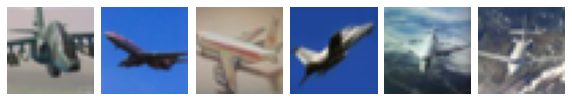

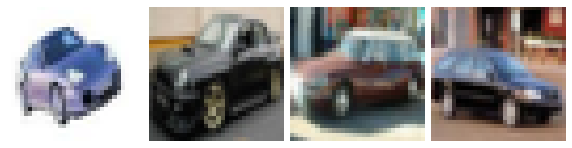

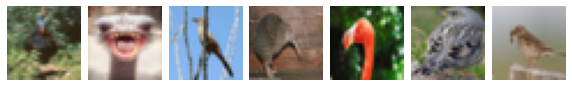

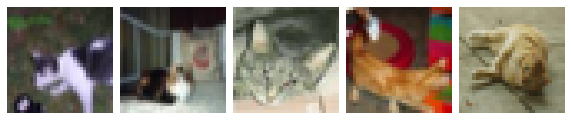

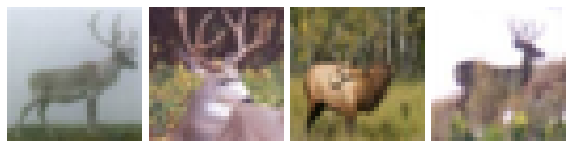

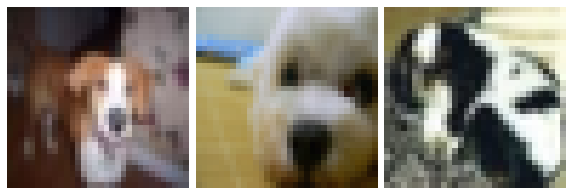

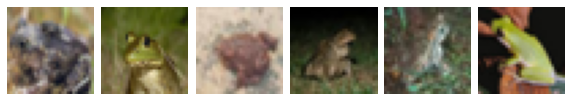

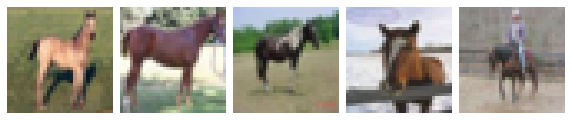

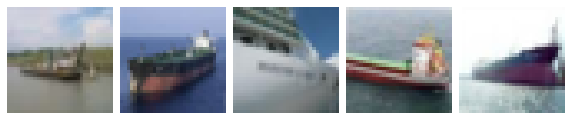

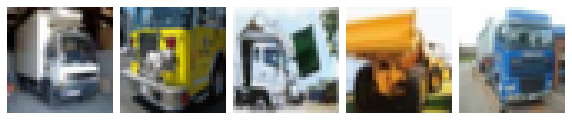

In [72]:
meta_set = torch.load("../results/logs_cifar10_uniform_noise_0.4_select_1_3/cached_meta_set")
meta_set.targets = meta_set.targets[:50]
meta_set.data = meta_set.data[:50]

for i in range(10):
    mask = (meta_set.targets == i)
    cnt = np.sum(mask).item()
    fig = plt.figure(figsize=(10, 10))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(1, cnt),  # creates 2x2 grid of axes
                     axes_pad=0.1,  # pad between axes in inch.
                     )
    for axs, id in zip(grid, range(cnt)):
        axs.imshow(meta_set.data[mask][id])
        axs.set_axis_off()
    plt.show()

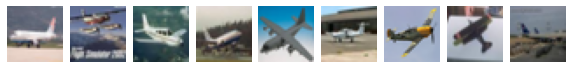

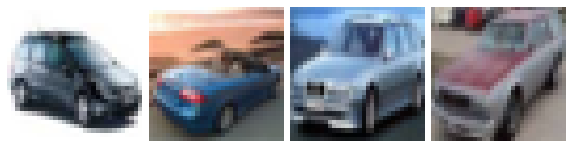

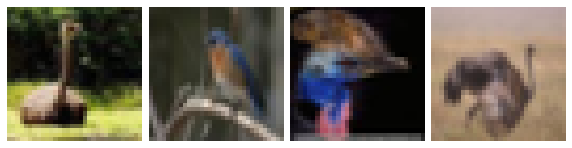

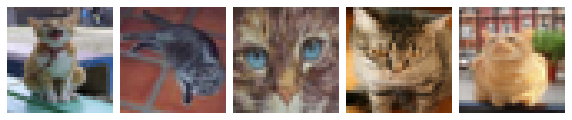

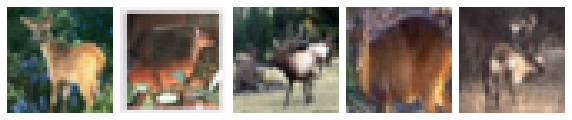

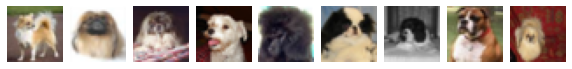

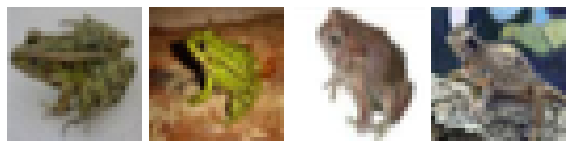

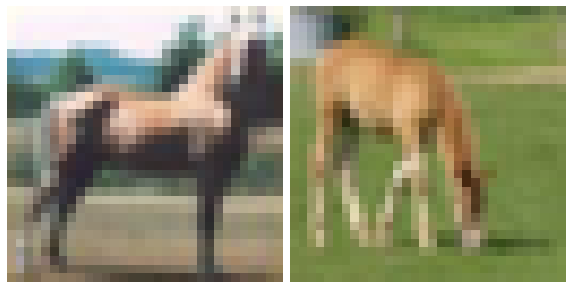

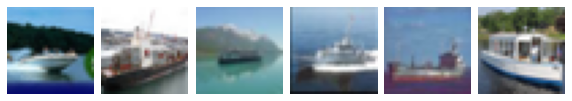

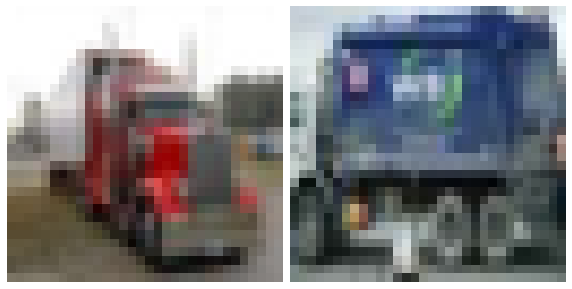

In [73]:
train_set = torch.load("../results/logs_cifar10_uniform_noise_0.4_select_1_3/cached_train_set")
true_labels = torch.load("../results/logs_cifar10_uniform_noise_0.4_select_1_3/cached_train_origin_labels")
rand_selection = torch.randperm(train_set.targets.shape[0])[:50].flatten()
for i in range(10):
    mask = rand_selection[(true_labels[rand_selection] == i)]
    meta_cnt = mask.shape[0]
    
    if meta_cnt == 0:
        continue

    fig = plt.figure(figsize=(10, 10))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(1, meta_cnt),  # creates 2x2 grid of axes
                     axes_pad=0.1,  # pad between axes in inch.
                     )
    for axs, id in zip(grid, range(meta_cnt)):
        axs.imshow(train_set.data[mask][id])
        axs.set_axis_off()
    plt.show()

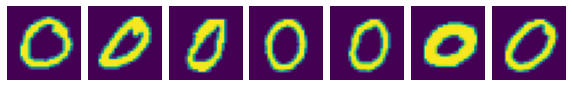

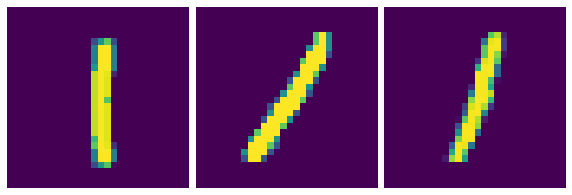

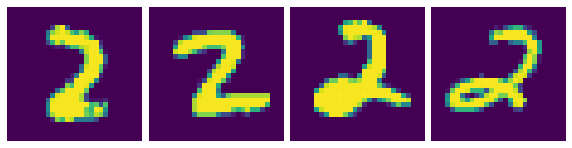

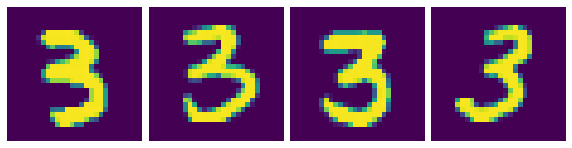

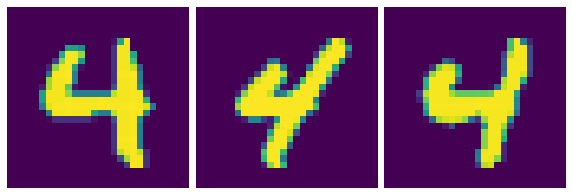

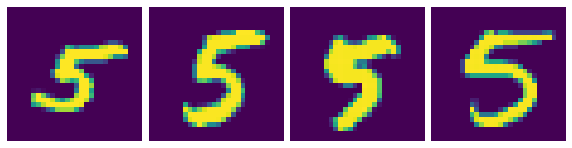

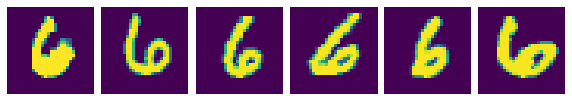

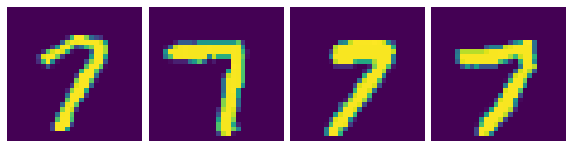

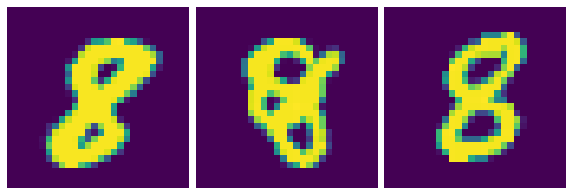

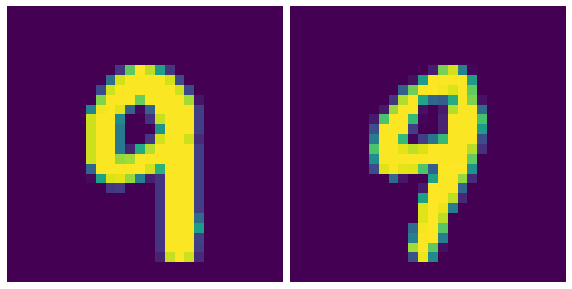

In [76]:
meta_set = torch.load("../results/logs_MNIST_uniform_noise_0.4_select_1_3/cached_meta_set")

for i in range(10):
    mask = (meta_set.targets == i)
    cnt = torch.sum(mask).item()
    fig = plt.figure(figsize=(10, 10))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(1, cnt),  # creates 2x2 grid of axes
                     axes_pad=0.1,  # pad between axes in inch.
                     )
    for axs, id in zip(grid, range(cnt)):
        axs.imshow(meta_set.data[mask][id])
        axs.set_axis_off()
    plt.show()